# Cyclin dependent kinase 2 ligands for pharmacophore identification

We explore cdk2 ligands that will be used to create ligand-based pharmacophore models

In [1]:
import openpharmacophore as oph

import pandas as pd
import nglview as nv
from rdkit import Chem
from rdkit.Chem import Draw

import os
from pprint import pprint
from IPython.display import SVG

## Load  and visualize ligands

We load the ligands from their respective smiles and draw their molecular structures

In [2]:
lig_df = pd.read_csv("ligands.csv")
lig_df

,Smiles,PDBID,LigID
0,C[C@@]12[C@@H]([C@@H](C[C@@H](O1)n3c4ccccc4c5c...,1AQ1,STU
1,c1nc(c2c(n1)n(cn2)[C@H]3[C@@H]([C@@H]([C@H](O3...,1FIN,ATP
2,COc1cc2c(cc1OC)ncnc2Nc3cccc(c3)O,1DI8,DTQ
3,c1ccnc(c1)NS(=O)(=O)c2ccc(cc2)NCC3=C4c5c(ncs5)...,1FVV,107
4,C1CCC(CC1)COc2c(c(nc(n2)N)N)N=O,1E1X,NW1
5,c1[nH]c2c(n1)c(nc(n2)N)OCC3CCCCC3,1E1V,CMG


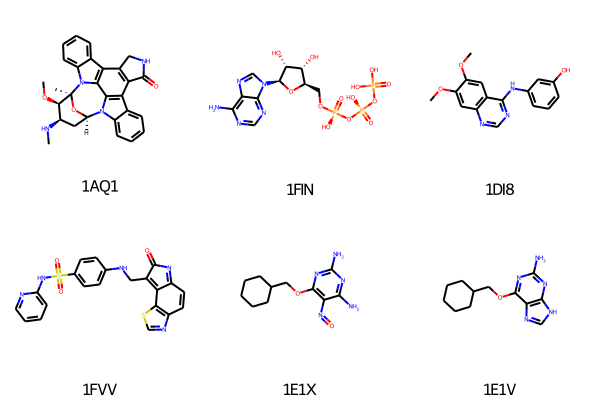

In [3]:
ligands = [Chem.MolFromSmiles(smi) for smi in lig_df["Smiles"]]
legends = [l for l in lig_df["PDBID"]]
Draw.MolsToGridImage(ligands, legends=legends, molsPerRow=3)

## Preparing the ligands

We'll generate different conformers for each of the ligands and add hydrogens to them
as well.

In [5]:
# Add hydrogens

pharmacophore = oph.LigandBasedPharmacophore()
pharmacophore.ligands = ligands
pharmacophore.add_hydrogens(ligands="all")

In [6]:
pharmacophore.generate_conformers(n_confs=-1, ligands="all")
print([l.GetNumConformers() for l in pharmacophore.ligands])

[3, 284, 4, 24, 15, 13]


## View 3D structures

In [8]:
lig_ind = 2
conf_ind = 2
nv.show_rdkit(pharmacophore.ligands[lig_ind], conf_ind=conf_ind)

NGLWidget()

## Chemical features

We find chemical features in the ligands and visualize them.

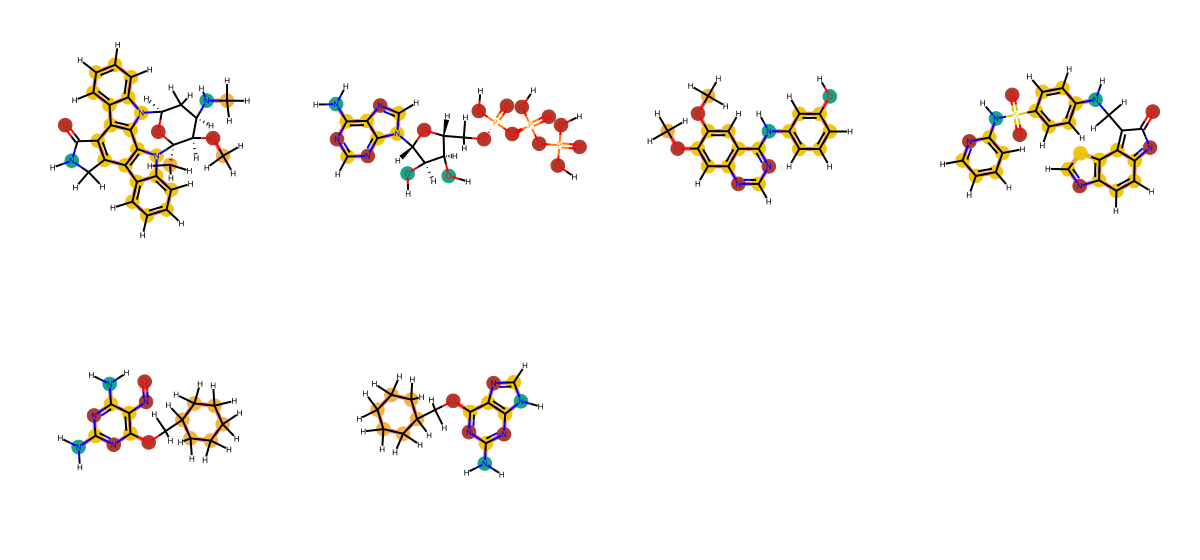

In [9]:
pharmacophore.find_chem_feats()
drawing = pharmacophore.draw((300, 280))
SVG(drawing.GetDrawingText())

## Extracting common pharmacophores

We extract common pharmacophores via recursive distance partitioning algorithm

### Finding 5-Point Pharmacophores

In [14]:
min_actives = len(pharmacophore.ligands) - 2
n_points = 5

In [15]:
pharmacophore.extract(
    n_points=n_points, min_actives=min_actives, max_pharmacophores=10
)
print(f"Found {len(pharmacophore)} common pharmacophores")

Found 0 common pharmacophores


### Finding 4-Point Pharmacophores

In [18]:
min_actives = len(pharmacophore.ligands) - 2
n_points = 4

pharma_4 = oph.LigandBasedPharmacophore()
pharma_4.ligands = pharmacophore.ligands
pharma_4.find_chem_feats()
pharma_4.extract(
    n_points=n_points, min_actives=min_actives, max_pharmacophores=10
)

print(f"Found {len(pharma_4)} common pharmacophores")

Found 4 common pharmacophores


In [19]:
pharma_4.show(0)

NGLWidget()

### Finding 3-Point Pharmacophores

In [20]:
min_actives = len(pharmacophore.ligands)
n_points = 3

pharma_3 = oph.LigandBasedPharmacophore()
pharma_3.ligands = pharmacophore.ligands
pharma_3.find_chem_feats()
pharma_3.extract(
    n_points=n_points, min_actives=min_actives, max_pharmacophores=10
)

print(f"Found {len(pharma_3)} common pharmacophores")

Found 9 common pharmacophores


In [21]:
pharma_3.show(0)

NGLWidget()